# Classification

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
from math import exp

### Data Input

In [2]:
data = pd.read_csv("C:\\Users\\deepa\\Desktop\\Classification\\data.csv")
data.drop(['User ID'],axis=1,inplace=True) ##Droped User Id as it had no use in making predictions.
X=data.iloc[:, :-1].values
y=data.iloc[:,-1].values
data.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


### Visualizing the dataset

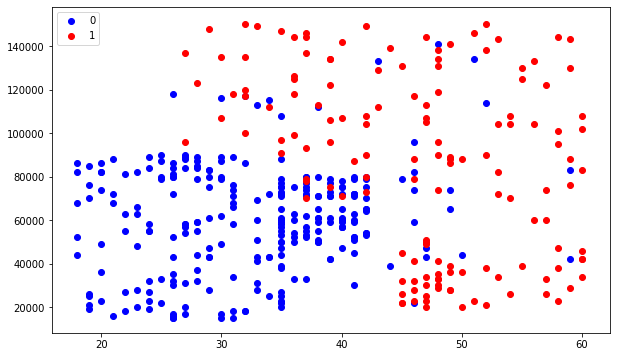

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0') 
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

### Divide the data to training set and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(320, 3) (320,)
(80, 3) (80,)


In [5]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

### Sigmoid and Cost Computation

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    return np.dot(x, theta)

def probability(theta, x):
    return sigmoid(net_input(theta, x))

### Cost Function and Gradient Descent

In [7]:
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

### Minimizing the Cost Function

In [8]:
def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

### Parameters

In [9]:
parameters = fit(X, y, theta)
parameters

array([-1.36237237e-05, -6.35116650e-05, -2.66530128e-06])

### Decision boundary 

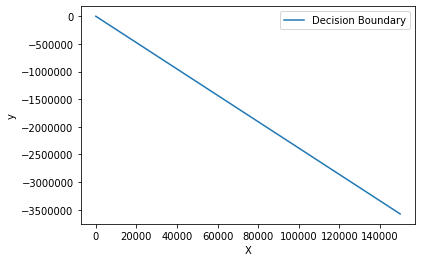

In [10]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Accuracy Check

In [11]:
def predict( x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y.flatten())

64.25